In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
df = pd.read_csv("IMDB_Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

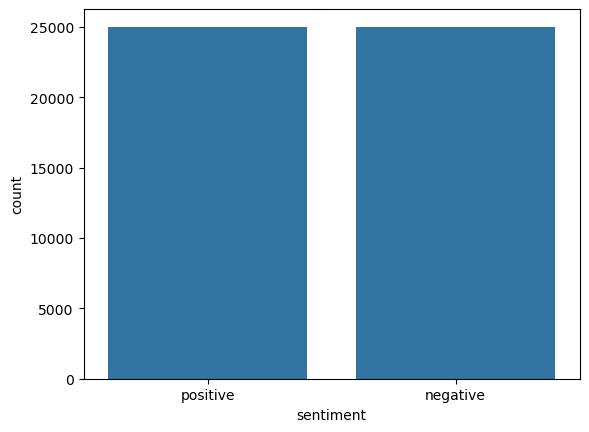

In [7]:
sns.barplot(df['sentiment'].value_counts())

In [8]:
for i in range(5):
    print(i)
    print(df['review'].iloc[i], "\n")
    print(df['sentiment'].iloc[i],  "\n\n")

0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [9]:
def wrd_cnt(text):
    word = text.split()
    word_count = len(word)
    return word_count


    

In [10]:
df['word_count'] = df['review'].apply(wrd_cnt)



In [11]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [12]:
df['sentiment'] = df['sentiment'].map({"positive": 1, "negative":0})

In [13]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [14]:

stop_words = set(stopwords.words('english'))

def data_preprocess(text):
    text = text.lower()
    text = re.sub(r'<br />|https\S+|www\S+https\S+|@\w+|#|[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [i for i in text_tokens if i not in stop_words]
    return " ".join(filtered_text)




In [15]:
df['review'] = df['review'].apply(data_preprocess)

In [16]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [17]:
dup_count = df.duplicated().sum()
print("dup entries", dup_count)


dup entries 421


In [18]:
df = df.drop_duplicates('review')

In [19]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [20]:
df.duplicated().sum()

0

In [21]:
stemmer = PorterStemmer()

def stem(data):
    [stemmer.stem(i) for i in data]
    return data


    

In [22]:
df['review'] = df.review.apply(lambda x: stem(x))

In [23]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [24]:
df['word_count'] = df['review'].apply(wrd_cnt)

In [25]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [26]:
pos_review = df[df['sentiment']==1]
pos_review.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [27]:
neg_review = df[df['sentiment']==0]
neg_review.head()

,review,sentiment,word_count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


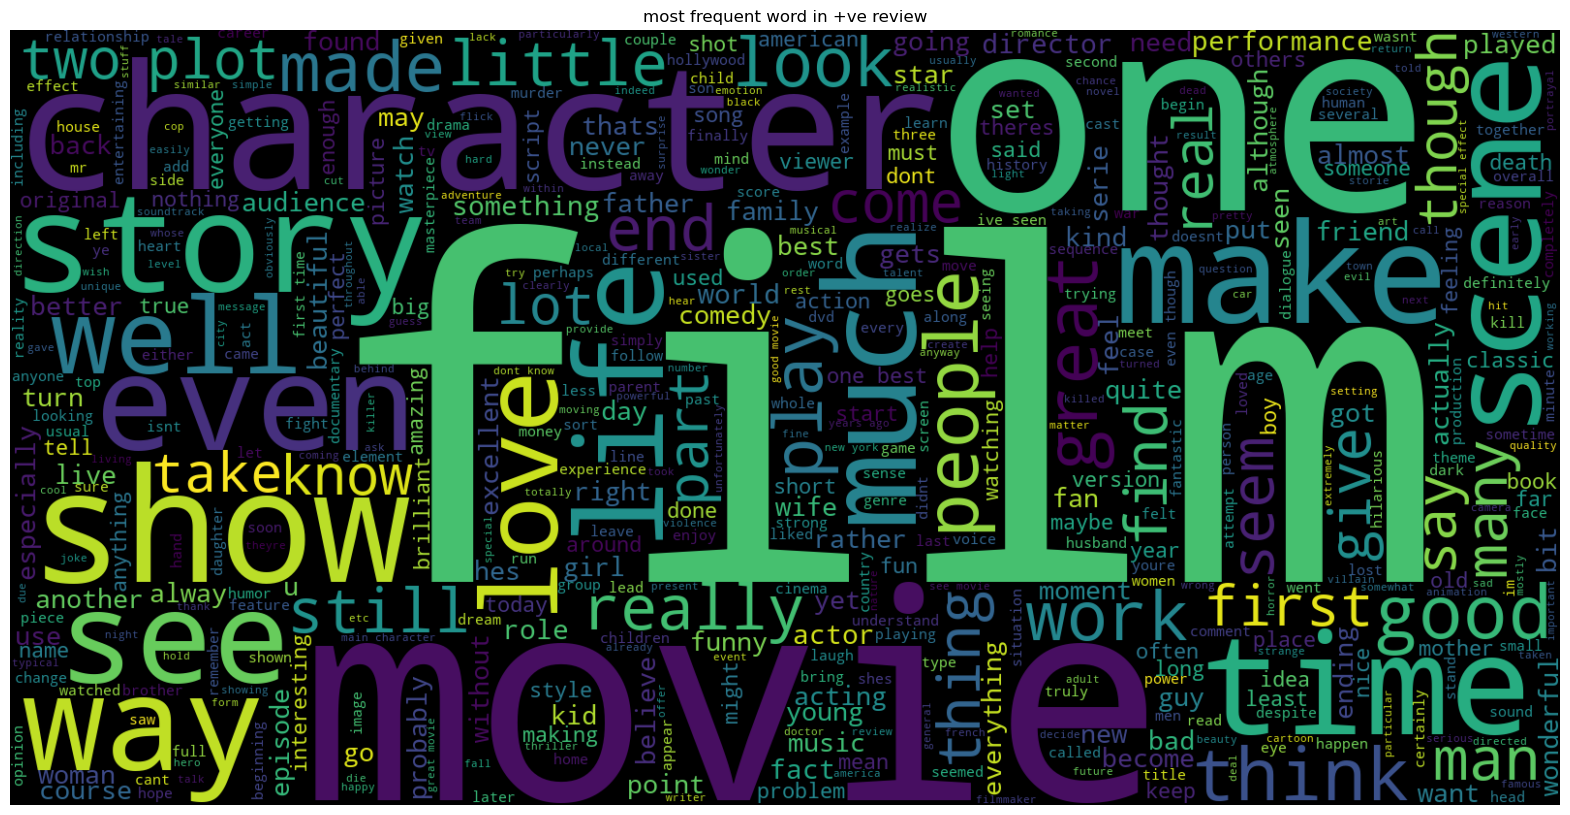

In [28]:
text = ' '.join([i for i in pos_review['review']])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('most frequent word in +ve review')
plt.show()


In [29]:
from collections import Counter

count  = Counter()
for text in pos_review['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)        


[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [30]:
pos_word = pd.DataFrame(count.most_common(15))
pos_word.columns = ['word', 'count']
pos_word.head()


,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


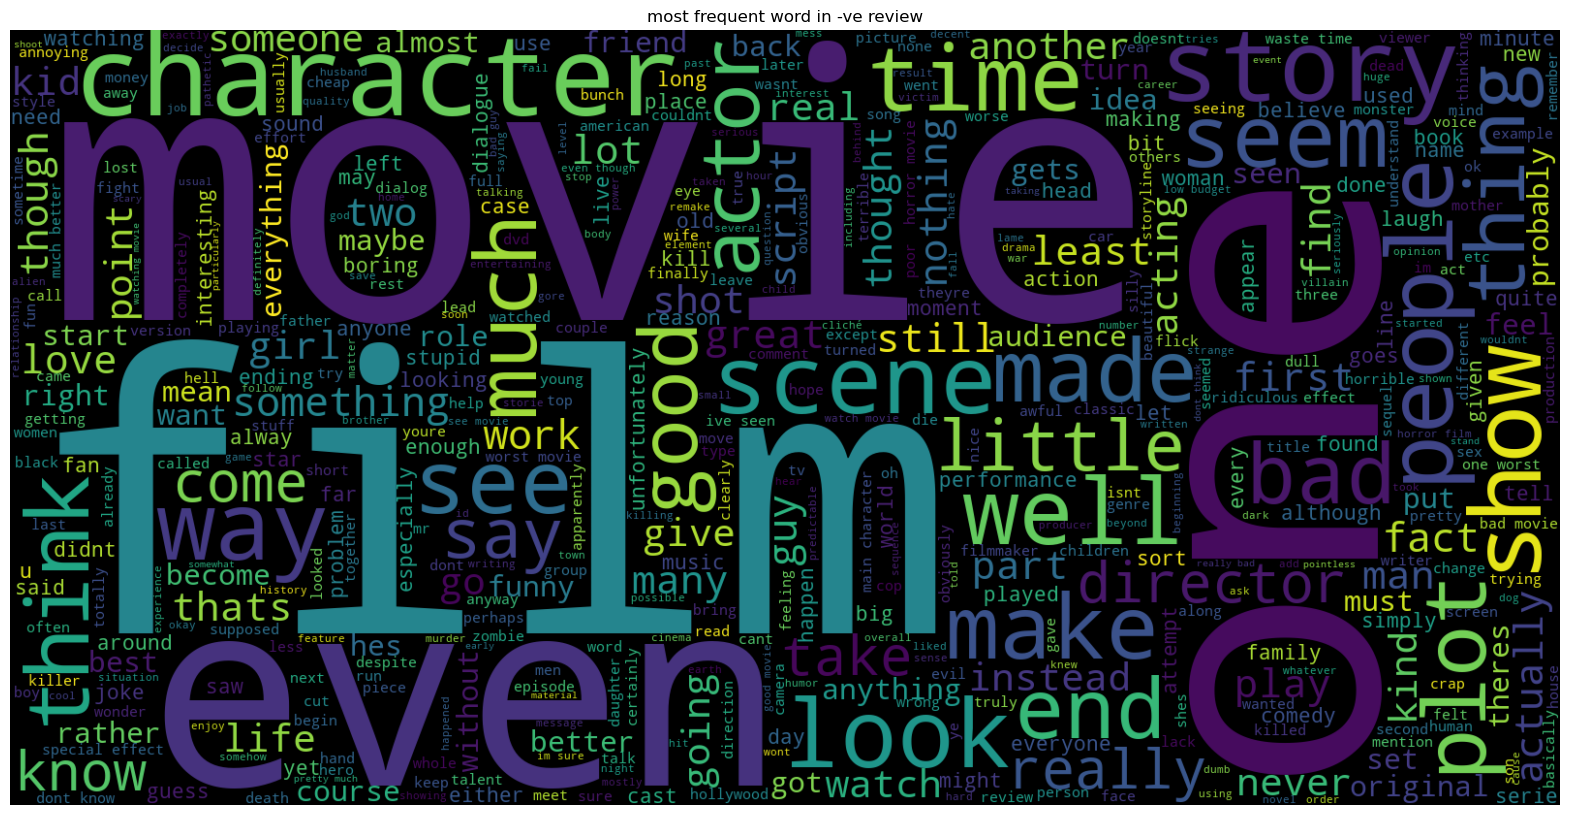

In [31]:
text = ' '.join([i for i in neg_review['review']])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('most frequent word in -ve review')
plt.show()


In [32]:
for text in neg_review['review']:
    for word in text.split():
        count[word]+=1

count.most_common(15)

[('movie', 82831),
 ('film', 73936),
 ('one', 49982),
 ('like', 38506),
 ('good', 28276),
 ('even', 24077),
 ('would', 23802),
 ('time', 23073),
 ('really', 22722),
 ('see', 22226),
 ('story', 21901),
 ('much', 18729),
 ('well', 18303),
 ('get', 18035),
 ('great', 17594)]

In [74]:
neg_count = pd.DataFrame(count.most_common(15))
neg_count.columns = ['word', 'count']
neg_count.head()

,word,count
0,movie,82831
1,film,73936
2,one,49982
3,like,38506
4,good,28276


In [76]:
x = df['review']
y = df['sentiment']

In [94]:
vect = TfidfVectorizer()
x = vect.fit_transform(df['review'])


In [164]:
joblib.dump(vect, 'vect.pkl')


['vect.pkl']

In [95]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4938954 stored elements and shape (49578, 221902)>
  Coords	Values
  (0, 177289)	0.0468994016332016
  (0, 49020)	0.0728307241819567
  (0, 200366)	0.056796422653534254
  (0, 209954)	0.12432736294589491
  (0, 204928)	0.07038027332591701
  (0, 41098)	0.07176493210442543
  (0, 21064)	0.04426094137688137
  (0, 121899)	0.036341766051522346
  (0, 67790)	0.047798134995315655
  (0, 178844)	0.06388756001663165
  (0, 187244)	0.05471108700030604
  (0, 110056)	0.047845922901488216
  (0, 24087)	0.09915262328962736
  (0, 203181)	0.04917948875959356
  (0, 38597)	0.052692599319509106
  (0, 124906)	0.05085726349190803
  (0, 119867)	0.0870654757587138
  (0, 213816)	0.025819880005588706
  (0, 17470)	0.03779042089650253
  (0, 81197)	0.05207315562465496
  (0, 141199)	0.049038744070599605
  (0, 107888)	0.04724573595235513
  (0, 99813)	0.1673011806916189
  (0, 134541)	0.10750823851690847
  (0, 181119)	0.06894899921954485
  :	:
  (49577, 69775)	0.09

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [130]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

logreg_pred =  logreg.predict(x_test)

log_acc = accuracy_score(logreg_pred, y_test)
print(log_acc)

0.891152346376227


0.891152346376227


In [132]:
print(confusion_matrix(y_test, logreg_pred))

print(classification_report(y_test, logreg_pred))

[[6465  896]
 [ 723 6790]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [134]:
# naive bayes model

nb = MultinomialNB()
nb.fit(x_train, y_train)

nb_pred =  nb.predict(x_test)

nb_acc = accuracy_score(nb_pred, y_test)
print(nb_acc)

0.8643270135807449


In [136]:
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

[[6419  942]
 [1076 6437]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [138]:
# SVC

svc = LinearSVC()

svc.fit(x_train, y_train)

svc_pred =  svc.predict(x_test)

svc_acc = accuracy_score(svc_pred, y_test)
print(svc_acc)


0.8923625117654969


In [140]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[6505  856]
 [ 745 6768]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [144]:
from sklearn.model_selection import GridSearchCV
param_grid =  {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.873 total time=   0.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.5s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.4s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.4s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [146]:
print('best score ',grid.best_score_)

best score  0.8939891809392213


In [148]:
print('best parameters ', grid.best_params_)

best parameters  {'C': 1, 'loss': 'hinge'}


In [150]:
# SVC after performing hypermater tuning
 
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred =  svc.predict(x_test)

svc_acc = accuracy_score(svc_pred, y_test)
print(svc_acc)


0.8939760656178567


In [152]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[6509  852]
 [ 725 6788]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



### make predections

In [160]:
import joblib

# Load the model from a file
joblib.dump(svc, 'svc.pkl')


['svc.pkl']

In [162]:
model = joblib.load('svc.pkl')
